In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib
from statsmodels.tsa.stattools import adfuller
import datetime
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.dates as mdates
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
from prophet import Prophet

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
semanal = pd.read_csv('semanal.csv')
semanal['pickup_datetime'] = pd.to_datetime(semanal['pickup_datetime'])
semanal.set_index('pickup_datetime', inplace=True)

# Semanal

In [1]:
semanal

NameError: name 'semanal' is not defined

In [ ]:
semanal_p = semanal['n_trips']

In [ ]:
semanal_p

,n_trips
pickup_datetime,
2023-09-30,2179200
2023-10-31,2736389
2023-11-30,2616757
2023-12-31,2625768
2024-01-31,2409342
2024-02-29,2448952
2024-03-31,2858661
2024-04-30,2777362
2024-05-31,2899539


In [ ]:
semanal_p = semanal_p.reset_index()

In [ ]:
semanal_p.rename(columns= {'pickup_datetime': 'ds', 'n_trips' : 'y'}, inplace = True)
semanal_p

,ds,y
0,2023-09-30,2179200
1,2023-10-31,2736389
2,2023-11-30,2616757
3,2023-12-31,2625768
4,2024-01-31,2409342
5,2024-02-29,2448952
6,2024-03-31,2858661
7,2024-04-30,2777362
8,2024-05-31,2899539
9,2024-06-30,2767032


# Evaluacion

## Modelo 1

In [ ]:
# Instanciamos un modelo de Prophet

prophet_1 = Prophet(
    daily_seasonality=False,    # Desactivar estacionalidad diaria
    yearly_seasonality=True,    # Activar estacionalidad anual para capturar patrones del año completo
    weekly_seasonality=True,    # Activar estacionalidad semanal si hay patrones semanales
    uncertainty_samples=100,    # Ajustar número de muestras para análisis de incertidumbre
    interval_width=0.8          # Intervalo de confianza del 80%
)

# Entrenamos el modelo
prophet_1.fit(semanal_p)

# Construimos un dataframe con los x valores futuros que querámos predecir. 52 semanas
build_forecast = prophet_1.make_future_dataframe(periods=52, freq='W') #

# Predecimos
forecast = prophet_1.predict(build_forecast)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3k5_54x0/9gsnlt3f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3k5_54x0/vkc4yb9n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43106', 'data', 'file=/tmp/tmp3k5_54x0/9gsnlt3f.json', 'init=/tmp/tmp3k5_54x0/vkc4yb9n.json', 'output', 'file=/tmp/tmp3k5_54x0/prophet_model6exz26r2/prophet_model-20241113072525.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:25:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:25:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast_1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-09-17,51547.111157,625736.075251,687761.290373,51547.111157,51547.111157,607075.511779,607075.511779,607075.511779,616441.064028,616441.064028,616441.064028,-9365.552249,-9365.552249,-9365.552249,0.0,0.0,0.0,658622.622935
1,2023-09-24,52029.200191,580856.900024,637004.324805,52029.200191,52029.200191,557434.445403,557434.445403,557434.445403,616441.064028,616441.064028,616441.064028,-59006.618625,-59006.618625,-59006.618625,0.0,0.0,0.0,609463.645595
2,2023-10-01,52511.289246,593355.880718,656120.364979,52511.289246,52511.289246,571623.306424,571623.306424,571623.306424,616441.064028,616441.064028,616441.064028,-44817.757604,-44817.757604,-44817.757604,0.0,0.0,0.0,624134.595670
3,2023-10-08,52993.378300,637185.803522,694045.862859,52993.378300,52993.378300,608965.825440,608965.825440,608965.825440,616441.064028,616441.064028,616441.064028,-7475.238588,-7475.238588,-7475.238588,0.0,0.0,0.0,661959.203740
4,2023-10-15,53475.467350,655545.052582,710539.807662,53475.467350,53475.467350,629111.973934,629111.973934,629111.973934,616441.064028,616441.064028,616441.064028,12670.909906,12670.909906,12670.909906,0.0,0.0,0.0,682587.441284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,2025-07-06,96863.476973,648950.890017,707333.185925,96863.424531,96863.520295,576669.021720,576669.021720,576669.021720,616441.064028,616441.064028,616441.064028,-39772.042308,-39772.042308,-39772.042308,0.0,0.0,0.0,673532.498694
95,2025-07-13,97345.565965,636504.697446,700358.343295,97345.512380,97345.610867,568641.899349,568641.899349,568641.899349,616441.064028,616441.064028,616441.064028,-47799.164679,-47799.164679,-47799.164679,0.0,0.0,0.0,665987.465314
96,2025-07-20,97827.654957,634282.473658,687492.738715,97827.600027,97827.701553,565919.589748,565919.589748,565919.589748,616441.064028,616441.064028,616441.064028,-50521.474280,-50521.474280,-50521.474280,0.0,0.0,0.0,663747.244704
97,2025-07-27,98309.743948,625778.174952,681197.818073,98309.687402,98309.792287,550370.141562,550370.141562,550370.141562,616441.064028,616441.064028,616441.064028,-66070.922466,-66070.922466,-66070.922466,0.0,0.0,0.0,648679.885510


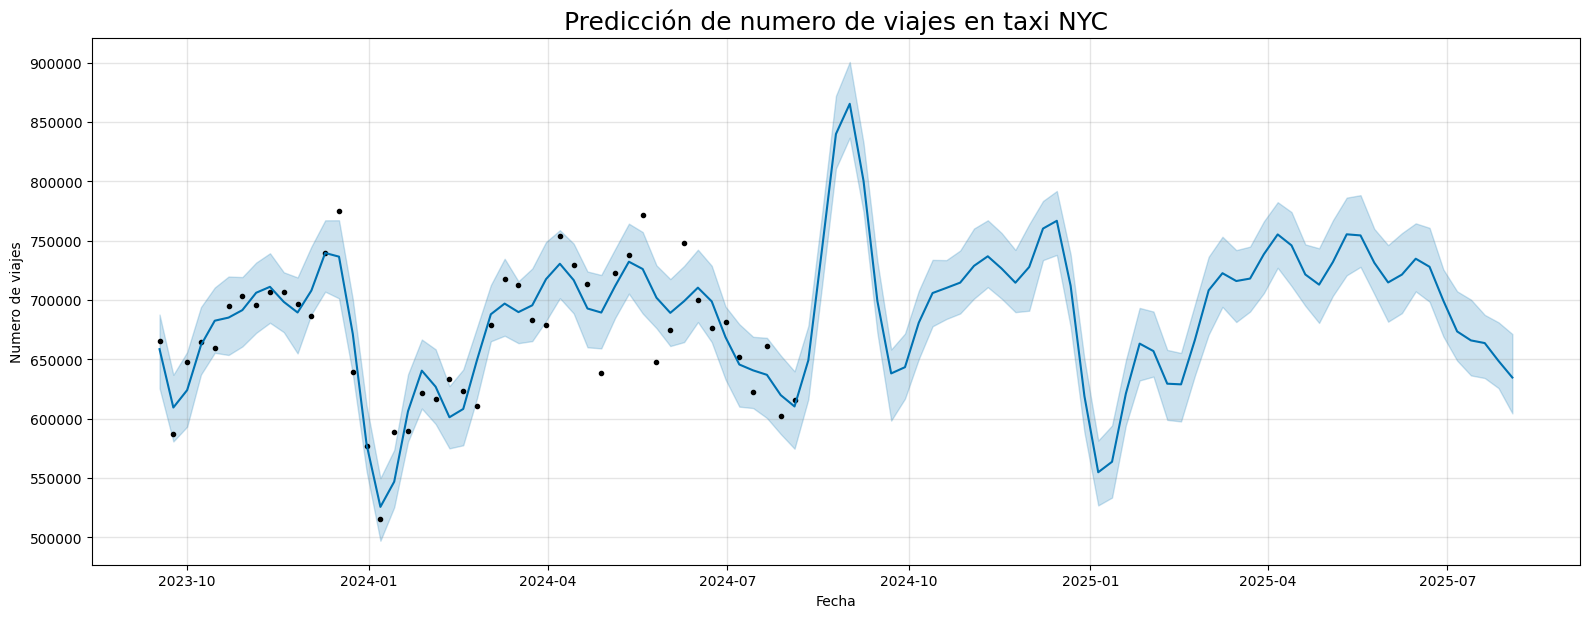

In [ ]:
# plot forecasts

prophet_1.plot(forecast_1, xlabel='Fecha', ylabel='Numero de viajes', figsize = (16,6))
plt.title('Predicción de numero de viajes semanal en taxi NYC', fontsize = 18)
plt.show()

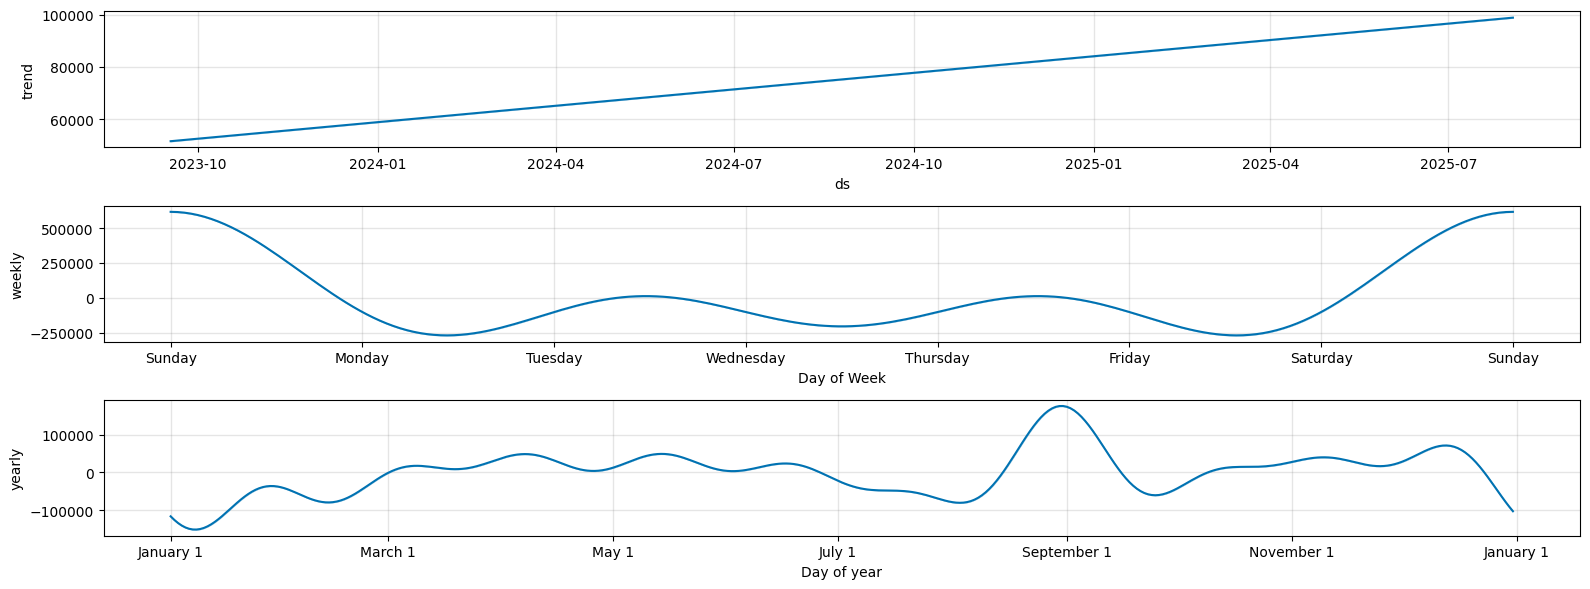

In [ ]:
# Ploteamos los componentes de nuestra serie de tiempo

components = prophet_1.plot_components(forecast, figsize=(16,6))

## Modelo 2

In [ ]:
# Instanciamos un modelo de Prophet

prophet_2 = Prophet(yearly_seasonality= True, weekly_seasonality= True,uncertainty_samples = 100, mcmc_samples=100, interval_width= 0.8)
#daily_seasonality=False,    # Desactivar estacionalidad diaria
 #   yearly_seasonality=True,    # Activar estacionalidad anual para capturar patrones del año completo
  #  weekly_seasonality=True,    # Activar estacionalidad semanal si hay patrones semanales
   # uncertainty_samples=100,    # Ajustar número de muestras para análisis de incertidumbre
    #interval_width=0.8
# Entrenamos el modelo
prophet_2.fit(semanal_p)

# Construimos un dataframe con los x valores futuros que querámos predecir. 52 semanas
build_forecast = prophet_2.make_future_dataframe(periods=52, freq='W') #

# Predecimos
forecast_2 = prophet_2.predict(build_forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3k5_54x0/qskx2a0y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3k5_54x0/lacbi9mk.json
08:03:02 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=21197', 'data', 'file=/tmp/tmp3k5_54x0/qskx2a0y.json', 'init=/tmp/tmp3k5_54x0/lacbi9mk.json', 'output', 'file=/tmp/tmp3k5_54x0/prophet_modelib0txqx7/prophet_model-20241113080303_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=21197', 'data', 'file=/tmp/tmp3k5_54x0/qskx2a0y.json', 'init=/tmp/tmp3k5_54x0/lacbi9mk.json', 'output', 'file=/tmp/tmp3k5_54x0/prophet_modelib0txqx7/prophet_model-20241113080303_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

08:03:09 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=21197', 'data', 'file=/tmp/tmp3k5_54x0/qskx2a0y.json', 'init=/tmp/tmp3k5_54x0/lacbi9mk.json', 'output', 'file=/tmp/tmp3k5_54x0/prophet_modelib0txqx7/prophet_model-20241113080303_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp3k5_54x0/prophet_modelib0txqx7/prophet_model-20241113080303_1.csv
 console_msgs (if any):
	/tmp/tmp3k5_54x0/prophet_modelib0txqx7/prophet_model-20241113080303_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [ ]:
forecast_2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-09-17,-730373.254400,5.968743e+05,7.167758e+05,-6.026096e+06,4.629727e+06,1.390348e+06,-3.998220e+06,6.710899e+06,1.476725e+06,-3.970972e+06,6.956969e+06,-86377.046476,-1.367841e+06,1.009687e+06,0.0,0.0,0.0,659974.628516
1,2023-09-24,-733999.357411,5.586992e+05,6.685810e+05,-6.029349e+06,4.653481e+06,1.344967e+06,-4.037941e+06,6.666677e+06,1.476725e+06,-3.970972e+06,6.956969e+06,-131757.794488,-1.405816e+06,9.418714e+05,0.0,0.0,0.0,610967.777495
2,2023-10-01,-737450.530539,5.725661e+05,6.789323e+05,-6.032532e+06,4.680061e+06,1.363549e+06,-4.065807e+06,6.677332e+06,1.476725e+06,-3.970972e+06,6.956969e+06,-113175.580019,-1.327382e+06,8.859396e+05,0.0,0.0,0.0,626098.818857
3,2023-10-08,-740901.703667,6.124195e+05,7.171498e+05,-6.040118e+06,4.706642e+06,1.403312e+06,-4.071741e+06,6.726947e+06,1.476725e+06,-3.970972e+06,6.956969e+06,-73412.613714,-1.222411e+06,8.465855e+05,0.0,0.0,0.0,662410.611999
4,2023-10-15,-744244.172623,6.388577e+05,7.350742e+05,-6.056239e+06,4.734082e+06,1.425682e+06,-4.055286e+06,6.771121e+06,1.476725e+06,-3.970972e+06,6.956969e+06,-51042.496701,-1.149352e+06,8.217587e+05,0.0,0.0,0.0,681438.260078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,2025-07-06,-984376.990248,-2.471847e+06,3.263442e+06,-8.725434e+06,5.996040e+06,1.498845e+06,-4.014215e+06,7.254563e+06,1.476725e+06,-3.970972e+06,6.956969e+06,22120.549120,-8.971986e+05,1.092518e+06,0.0,0.0,0.0,514468.488258
95,2025-07-13,-986953.034721,-2.479434e+06,3.268166e+06,-8.776151e+06,6.039916e+06,1.491173e+06,-4.057885e+06,7.266479e+06,1.476725e+06,-3.970972e+06,6.956969e+06,14448.191398,-9.168939e+05,1.128613e+06,0.0,0.0,0.0,504220.086047
96,2025-07-20,-989529.079194,-2.493752e+06,3.258132e+06,-8.828387e+06,6.083845e+06,1.491352e+06,-4.069700e+06,7.284692e+06,1.476725e+06,-3.970972e+06,6.956969e+06,14626.909720,-9.698485e+05,1.170946e+06,0.0,0.0,0.0,501822.759880
97,2025-07-27,-992105.123667,-2.436203e+06,3.215387e+06,-8.881296e+06,6.125207e+06,1.481904e+06,-4.073063e+06,7.293364e+06,1.476725e+06,-3.970972e+06,6.956969e+06,5179.235990,-1.066158e+06,1.269671e+06,0.0,0.0,0.0,489799.041698


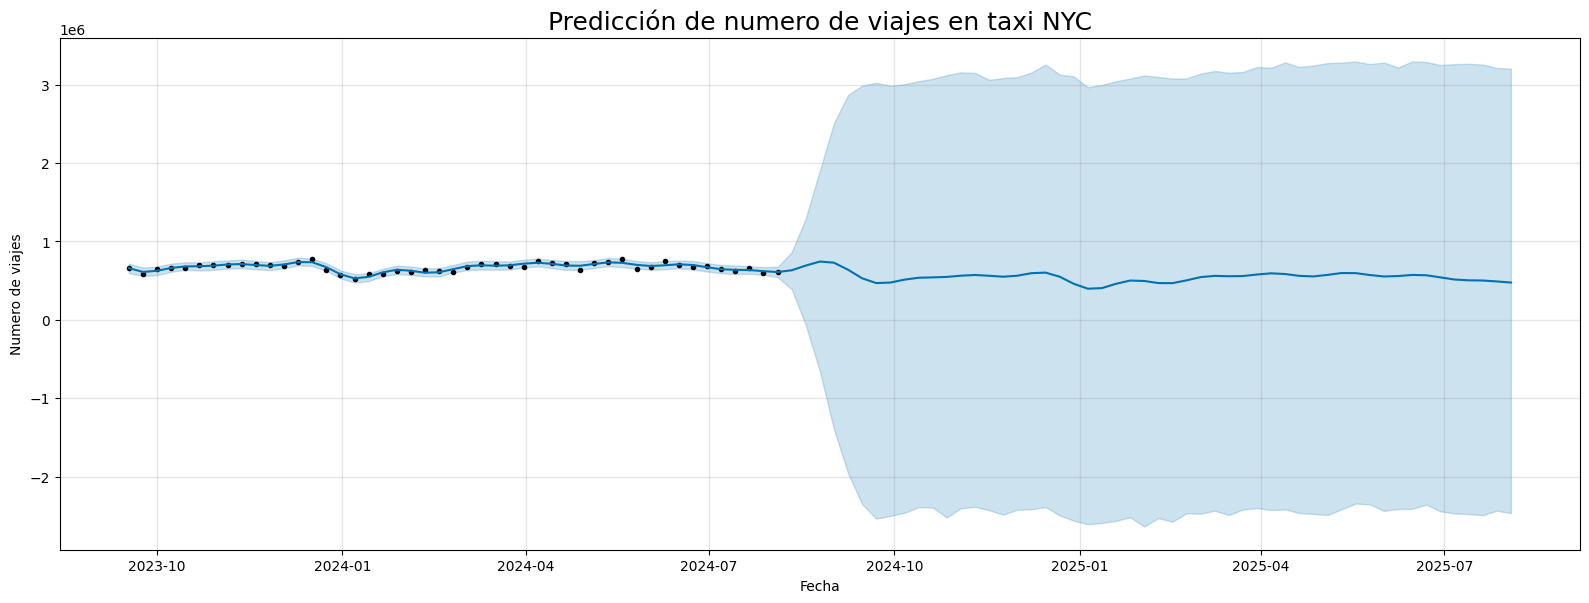

In [ ]:
# plot forecasts

prophet_2.plot(forecast_2, xlabel='Fecha', ylabel='Numero de viajes', figsize = (16,6))
plt.title('Predicción de numero de viajes semanales en taxi NYC', fontsize = 18)
plt.show()

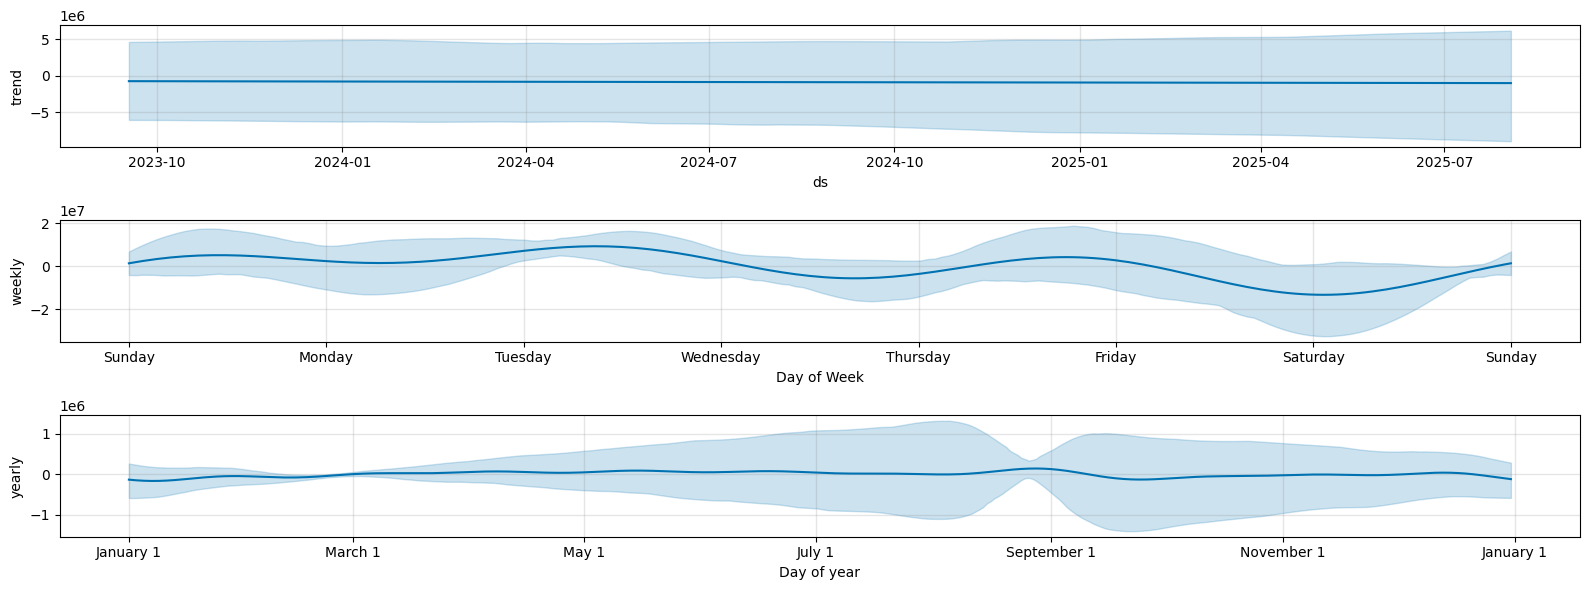

In [ ]:
# Ploteamos los componentes de nuestra serie de tiempo

components = prophet_2.plot_components(forecast_2, figsize=(16,6))

## Evaluacion

In [ ]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

### Modelo 1

In [ ]:
df_cv_3 = cross_validation(prophet_3, initial = '60 days', horizon = '60 days')

In [ ]:
df_cv_3


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2023-12-31,1.962907e+07,-4.977241e+07,8.705697e+07,2625768,2023-12-05
1,2024-01-31,-3.060234e+07,-8.168394e+07,5.879553e+07,2409342,2023-12-05
2,2024-01-31,4.046802e+07,-7.864526e+05,9.458594e+07,2409342,2024-01-04
3,2024-02-29,3.810623e+07,3.255013e+06,7.941343e+07,2448952,2024-01-04
4,2024-02-29,3.007854e+07,-8.272627e+06,6.551549e+07,2448952,2024-02-03
5,2024-03-31,3.156560e+07,-2.021289e+07,1.116089e+08,2858661,2024-02-03
6,2024-03-31,-3.677982e+07,-7.679098e+07,1.815845e+06,2858661,2024-03-04
7,2024-04-30,-2.154453e+07,-7.514538e+07,4.185467e+07,2777362,2024-03-04
8,2024-04-30,3.694868e+07,1.172774e+05,9.187567e+07,2777362,2024-04-03
9,2024-05-31,6.180645e+07,-1.228359e+07,1.197656e+08,2899539,2024-04-03


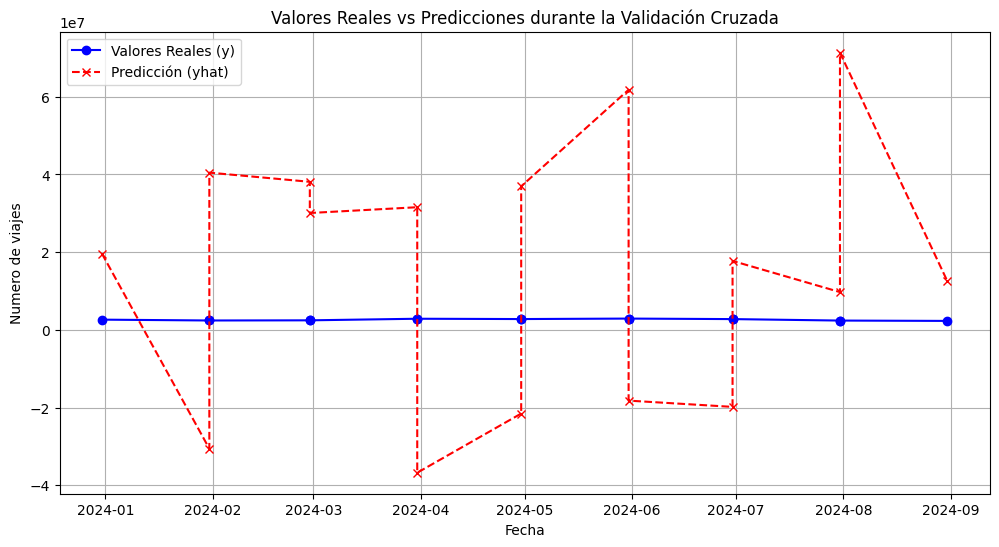

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(df_cv_3['ds'], df_cv_3['y'], label='Valores Reales (y)', color='blue', marker='o')
plt.plot(df_cv_3['ds'], df_cv_3['yhat'], label='Predicción (yhat)', color='red', linestyle='--', marker='x')

plt.xlabel('Fecha')
plt.ylabel('Numero de viajes')
plt.title('Valores Reales vs Predicciones durante la Validación Cruzada')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df_p_3 = performance_metrics(df_cv_3)
df_p_3.describe()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
count,9,9.000000e+00,9.000000e+00,9.000000e+00,9.000000,9.000000,9.000000,9.000000
mean,44 days 10:40:00,1.251766e+15,3.047426e+07,2.991500e+07,11.690239,11.588678,1.688193,0.685185
std,16 days 03:11:42.148646023,1.462977e+15,1.906494e+07,1.879702e+07,7.734538,7.745370,0.244817,0.428535
min,26 days 00:00:00,5.372892e+13,7.330001e+06,7.330001e+06,3.067266,3.067266,1.210620,0.000000
25%,28 days 00:00:00,3.351463e+14,1.830700e+07,1.804756e+07,6.347961,6.347961,1.613450,0.500000
50%,56 days 00:00:00,8.351380e+14,2.889876e+07,2.868017e+07,10.833607,10.042092,1.758457,1.000000
75%,58 days 00:00:00,1.395784e+15,3.736019e+07,3.728949e+07,14.241409,14.241409,1.870346,1.000000
max,60 days 00:00:00,4.753728e+15,6.894729e+07,6.894729e+07,28.851243,28.851243,1.910378,1.000000


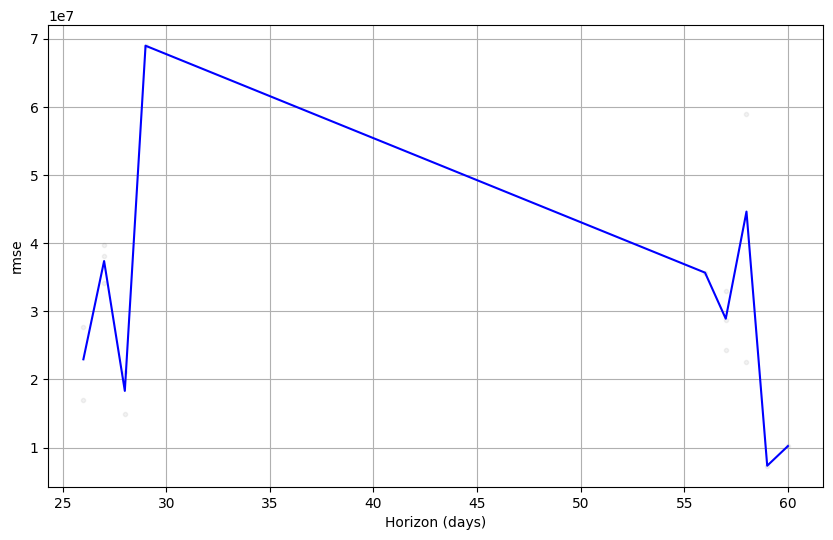

In [ ]:
fig = plot_cross_validation_metric(df_cv_3, metric='rmse')

In [ ]:
print('El RMSE es:', df_p_3.rmse.mean())

El RMSE es: 30474258.06660311


In [ ]:
df_p = performance_metrics(df_cv_3, rolling_window = 1)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,60 days,1.161218e+15,3.407665e+07,3.014317e+07,11.520306,10.662151,1.743127,0.75


### Modelo 1

In [ ]:
df_cv_3 = cross_validation(prophet_3, initial = '60 days', horizon = '60 days')

In [ ]:
df_cv_3


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2023-12-31,1.962907e+07,-4.977241e+07,8.705697e+07,2625768,2023-12-05
1,2024-01-31,-3.060234e+07,-8.168394e+07,5.879553e+07,2409342,2023-12-05
2,2024-01-31,4.046802e+07,-7.864526e+05,9.458594e+07,2409342,2024-01-04
3,2024-02-29,3.810623e+07,3.255013e+06,7.941343e+07,2448952,2024-01-04
4,2024-02-29,3.007854e+07,-8.272627e+06,6.551549e+07,2448952,2024-02-03
5,2024-03-31,3.156560e+07,-2.021289e+07,1.116089e+08,2858661,2024-02-03
6,2024-03-31,-3.677982e+07,-7.679098e+07,1.815845e+06,2858661,2024-03-04
7,2024-04-30,-2.154453e+07,-7.514538e+07,4.185467e+07,2777362,2024-03-04
8,2024-04-30,3.694868e+07,1.172774e+05,9.187567e+07,2777362,2024-04-03
9,2024-05-31,6.180645e+07,-1.228359e+07,1.197656e+08,2899539,2024-04-03


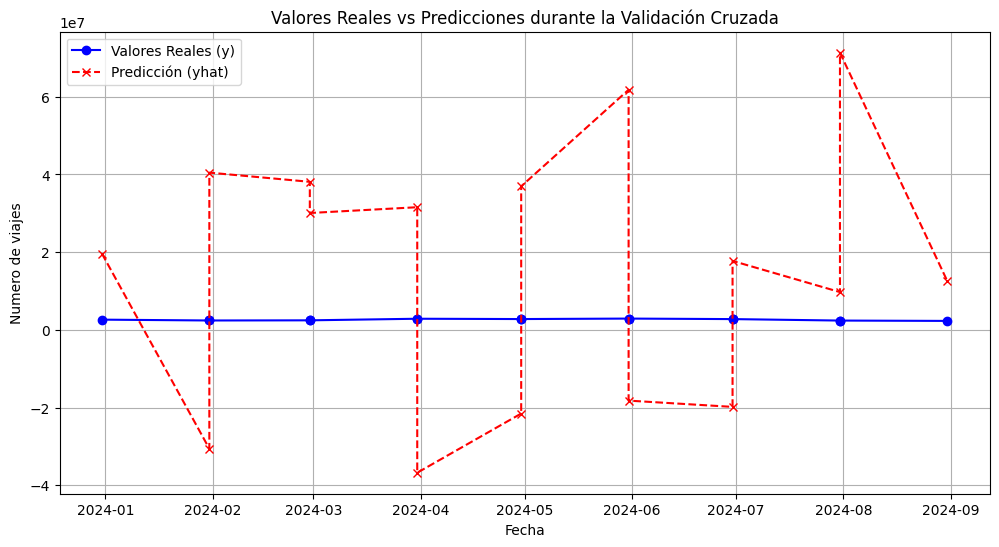

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(df_cv_3['ds'], df_cv_3['y'], label='Valores Reales (y)', color='blue', marker='o')
plt.plot(df_cv_3['ds'], df_cv_3['yhat'], label='Predicción (yhat)', color='red', linestyle='--', marker='x')

plt.xlabel('Fecha')
plt.ylabel('Numero de viajes')
plt.title('Valores Reales vs Predicciones durante la Validación Cruzada')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df_p_3 = performance_metrics(df_cv_3)
df_p_3.describe()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
count,9,9.000000e+00,9.000000e+00,9.000000e+00,9.000000,9.000000,9.000000,9.000000
mean,44 days 10:40:00,1.251766e+15,3.047426e+07,2.991500e+07,11.690239,11.588678,1.688193,0.685185
std,16 days 03:11:42.148646023,1.462977e+15,1.906494e+07,1.879702e+07,7.734538,7.745370,0.244817,0.428535
min,26 days 00:00:00,5.372892e+13,7.330001e+06,7.330001e+06,3.067266,3.067266,1.210620,0.000000
25%,28 days 00:00:00,3.351463e+14,1.830700e+07,1.804756e+07,6.347961,6.347961,1.613450,0.500000
50%,56 days 00:00:00,8.351380e+14,2.889876e+07,2.868017e+07,10.833607,10.042092,1.758457,1.000000
75%,58 days 00:00:00,1.395784e+15,3.736019e+07,3.728949e+07,14.241409,14.241409,1.870346,1.000000
max,60 days 00:00:00,4.753728e+15,6.894729e+07,6.894729e+07,28.851243,28.851243,1.910378,1.000000


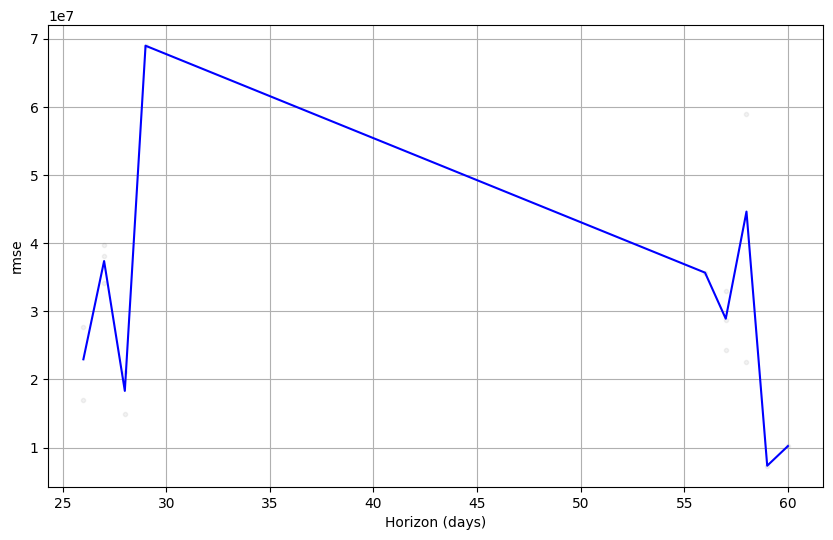

In [ ]:
fig = plot_cross_validation_metric(df_cv_3, metric='rmse')

In [ ]:
print('El RMSE es:', df_p_3.rmse.mean())

El RMSE es: 30474258.06660311


In [ ]:
df_p = performance_metrics(df_cv_3, rolling_window = 1)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,60 days,1.161218e+15,3.407665e+07,3.014317e+07,11.520306,10.662151,1.743127,0.75
